In [42]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU, BatchNormalization
from keras import backend
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
import math
warnings.filterwarnings("ignore")

In [43]:
# Hyperparams
n_units = 400
layers = 4
n_batch = 4096
n_epochs = 50

In [44]:
call_df = pd.read_csv('../data.csv')

In [45]:
call_df.head()

,strike_price,best_bid,best_offer,date_ndiff,treasury_rate,closing_price,sigma_20
0,334.0,4.50,4.57,3,15.146374,333.84,0.3812
1,335.0,3.83,3.90,3,15.146374,333.84,0.3647
2,336.0,3.24,3.28,3,15.146374,333.84,0.3500
3,337.0,2.68,2.72,3,15.146374,333.84,0.3358
4,338.0,2.19,2.22,3,15.146374,333.84,0.3238


In [46]:
call_X_train, call_X_test, call_y_train, call_y_test = train_test_split(call_df.drop(['best_bid', 'best_offer'], axis=1),
                                                                        call_df[['best_bid', 'best_offer']],
                                                                        test_size=0.01, random_state=42)

In [47]:
model = Sequential()
model.add(Dense(n_units, input_dim=call_X_train.shape[1]))
model.add(LeakyReLU())

for _ in range(layers - 1):
    model.add(Dense(n_units))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

model.add(Dense(2, activation='relu'))

model.compile(loss='mse', optimizer=Adam())

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 400)               2400      
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 400)               0         
                                                                 
 dense_11 (Dense)            (None, 400)               160400    
                                                                 
 batch_normalization_6 (Batc  (None, 400)              1600      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 400)               160400    
                                                      

In [49]:
history = model.fit(call_X_train, call_y_train, 
                    batch_size=n_batch, epochs=n_epochs, 
                    validation_split = 0.01,
                    callbacks=[TensorBoard()],
                    verbose=1)

Epoch 1/50
11/11 [==============================] - 4s 188ms/step - loss: 489.6070 - val_loss: 580.1790
Epoch 2/50
11/11 [==============================] - 2s 165ms/step - loss: 307.9321 - val_loss: 190.4507
Epoch 3/50
11/11 [==============================] - 2s 166ms/step - loss: 211.5641 - val_loss: 576.9182
Epoch 4/50
11/11 [==============================] - 2s 142ms/step - loss: 143.4722 - val_loss: 1053.7781
Epoch 5/50
11/11 [==============================] - 2s 155ms/step - loss: 94.6743 - val_loss: 535.3347
Epoch 6/50
11/11 [==============================] - 2s 146ms/step - loss: 61.2614 - val_loss: 186.8153
Epoch 7/50
11/11 [==============================] - 2s 145ms/step - loss: 40.2256 - val_loss: 134.8028
Epoch 8/50
11/11 [==============================] - 2s 154ms/step - loss: 28.4874 - val_loss: 147.1667
Epoch 9/50
11/11 [==============================] - 2s 145ms/step - loss: 19.7036 - val_loss: 110.6463
Epoch 10/50
11/11 [==============================] - 2s 151ms/step -

In [50]:
model.save('mlp2-call30.h5')

In [51]:
call_y_pred30 = model.predict(call_X_test)

15/15 [==============================] - 0s 1ms/step


In [52]:
print('equilibrium mse', np.mean(np.square(np.mean(call_y_test.values, axis=1) - np.mean(call_y_pred30, axis=1))))
print('spread mse', np.mean(np.square(np.diff(call_y_test.values, axis=1) - np.diff(call_y_pred30, axis=1))))

equilibrium mse 29.32860403585211
spread mse 0.22965403636740409


In [53]:
model.compile(loss='mse', optimizer=Adam(1e-4))
history = model.fit(call_X_train, call_y_train, 
                    batch_size=n_batch, epochs=n_epochs, 
                    validation_split = 0.01,
                    callbacks=[TensorBoard()],
                    verbose=1)

Epoch 1/50
11/11 [==============================] - 3s 146ms/step - loss: 3.1918 - val_loss: 16.9369
Epoch 2/50
11/11 [==============================] - 1s 133ms/step - loss: 2.7751 - val_loss: 18.7113
Epoch 3/50
11/11 [==============================] - 1s 137ms/step - loss: 2.7199 - val_loss: 4.0577
Epoch 4/50
11/11 [==============================] - 2s 143ms/step - loss: 2.9979 - val_loss: 17.1505
Epoch 5/50
11/11 [==============================] - 1s 136ms/step - loss: 2.8396 - val_loss: 5.1376
Epoch 6/50
11/11 [==============================] - 1s 132ms/step - loss: 2.6223 - val_loss: 4.5321
Epoch 7/50
11/11 [==============================] - 1s 134ms/step - loss: 2.5063 - val_loss: 6.6928
Epoch 8/50
11/11 [==============================] - 1s 134ms/step - loss: 2.4407 - val_loss: 1.9820
Epoch 9/50
11/11 [==============================] - 2s 141ms/step - loss: 2.5712 - val_loss: 2.1072
Epoch 10/50
11/11 [==============================] - 2s 140ms/step - loss: 2.4681 - val_loss: 7.0

In [54]:
model.save('mlp2-call40.h5')

In [55]:
call_y_pred40 = model.predict(call_X_test)
print('equilibrium mse', np.mean(np.square(np.mean(call_y_test.values, axis=1) - np.mean(call_y_pred40, axis=1))))
print('spread mse', np.mean(np.square(np.diff(call_y_test.values, axis=1) - np.diff(call_y_pred40, axis=1))))

15/15 [==============================] - 0s 3ms/step
equilibrium mse 3.0163733005580244
spread mse 0.17447371990407556


In [56]:
model.compile(loss='mse', optimizer=Adam(1e-5))
history = model.fit(call_X_train, call_y_train, 
                    batch_size=n_batch, epochs=10, 
                    validation_split = 0.01,
                    callbacks=[TensorBoard()],
                    verbose=1)

Epoch 1/10
11/11 [==============================] - 5s 223ms/step - loss: 2.2818 - val_loss: 7.0725
Epoch 2/10
11/11 [==============================] - 2s 220ms/step - loss: 2.1132 - val_loss: 6.9057
Epoch 3/10
11/11 [==============================] - 2s 184ms/step - loss: 1.9540 - val_loss: 6.3352
Epoch 4/10
11/11 [==============================] - 2s 197ms/step - loss: 1.9409 - val_loss: 4.2723
Epoch 5/10
11/11 [==============================] - 3s 283ms/step - loss: 1.8800 - val_loss: 4.5141
Epoch 6/10
11/11 [==============================] - 2s 171ms/step - loss: 1.9837 - val_loss: 4.8216
Epoch 7/10
11/11 [==============================] - 3s 238ms/step - loss: 2.1604 - val_loss: 3.5536
Epoch 8/10
11/11 [==============================] - 2s 169ms/step - loss: 2.0528 - val_loss: 5.2982
Epoch 9/10
11/11 [==============================] - 2s 145ms/step - loss: 2.0931 - val_loss: 5.3414
Epoch 10/10
11/11 [==============================] - 2s 208ms/step - loss: 1.9774 - val_loss: 4.0310

In [57]:
model.save('mlp2-call50.h5')
call_y_pred50 = model.predict(call_X_test)
print('equilibrium mse', np.mean(np.square(np.mean(call_y_test.values, axis=1) - np.mean(call_y_pred50, axis=1))))
print('spread mse', np.mean(np.square(np.diff(call_y_test.values, axis=1) - np.diff(call_y_pred50, axis=1))))

15/15 [==============================] - 0s 1ms/step
equilibrium mse 3.929644410975308
spread mse 0.17185924066445898


In [58]:
model.compile(loss='mse', optimizer=Adam(1e-6))
history = model.fit(call_X_train, call_y_train, 
                    batch_size=n_batch, epochs=10, 
                    validation_split = 0.01,
                    callbacks=[TensorBoard()],
                    verbose=1)

Epoch 1/10
11/11 [==============================] - 3s 183ms/step - loss: 1.9437 - val_loss: 3.5873
Epoch 2/10
11/11 [==============================] - 1s 137ms/step - loss: 1.9402 - val_loss: 3.2885
Epoch 3/10
11/11 [==============================] - 2s 142ms/step - loss: 2.3196 - val_loss: 3.0457
Epoch 4/10
11/11 [==============================] - 1s 137ms/step - loss: 1.9715 - val_loss: 2.8358
Epoch 5/10
11/11 [==============================] - 1s 136ms/step - loss: 2.0326 - val_loss: 2.5726
Epoch 6/10
11/11 [==============================] - 1s 135ms/step - loss: 1.9392 - val_loss: 2.2569
Epoch 7/10
11/11 [==============================] - 2s 150ms/step - loss: 2.1521 - val_loss: 2.1403
Epoch 8/10
11/11 [==============================] - 2s 140ms/step - loss: 1.8301 - val_loss: 2.0437
Epoch 9/10
11/11 [==============================] - 2s 149ms/step - loss: 1.9234 - val_loss: 1.9797
Epoch 10/10
11/11 [==============================] - 2s 141ms/step - loss: 2.0134 - val_loss: 1.9081

In [59]:
model.save('mlp2-call60.h5')
call_y_pred60 = model.predict(call_X_test)
print('equilibrium mse', np.mean(np.square(np.mean(call_y_test.values, axis=1) - np.mean(call_y_pred60, axis=1))))
print('spread mse', np.mean(np.square(np.diff(call_y_test.values, axis=1) - np.diff(call_y_pred60, axis=1))))

15/15 [==============================] - 0s 2ms/step
equilibrium mse 2.035315241687155
spread mse 0.1716649090513774


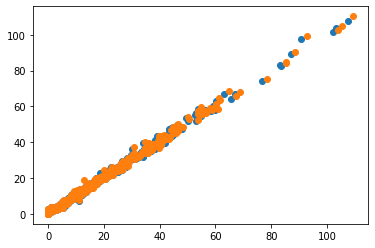

In [64]:
import matplotlib.pyplot as plt
plt.plot(call_y_pred60, np.array(call_y_test),'o')
plt.show()